Задача прогнозирования стоимости бриллиантов (задача регрессии) с Kaggle

In [5]:
import pandas as ps
import seaborn as sns
import numpy as np

In [31]:
diamonds_data = pd.read_csv('./diamonds.csv').reset_index()

In [32]:
diamonds_data.head()

,index,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
diamonds_data = diamonds_data.rename(columns={'Unnamed: 0': 'drop_me'})
diamonds_data.drop(['index', 'drop_me'], axis=1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [43]:
diamonds_data.shape

(53940, 12)

# Подготовка данных:
- Проверить адекватность колонок (нельзя использовать данные, которые нам будут недоступны в production)
- Обработать пропуски в данных (модели обычно не принимают пропуски в данных)
- Перевести категориальные значения в численные (модели обычно не принимают категориальные данные)

In [46]:
# Проверим наличие пропусков в данных
diamonds_data.isna().sum()

index      0
drop_me    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Пропусков нет. Если бы были:
## Пример: могли бы заполнить пропуски модой
### df['color'].fillna(df['color'].mode()[0], inplace=True)

# Находим категориальные колонки и используем LabelEncoder для перевода в численные значения

In [48]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   drop_me  53940 non-null  int64  
 2   carat    53940 non-null  float64
 3   cut      53940 non-null  object 
 4   color    53940 non-null  object 
 5   clarity  53940 non-null  object 
 6   depth    53940 non-null  float64
 7   table    53940 non-null  float64
 8   price    53940 non-null  int64  
 9   x        53940 non-null  float64
 10  y        53940 non-null  float64
 11  z        53940 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


In [49]:
from sklearn import preprocessing

In [51]:
cat_columns = [name for name in diamonds_data.columns if diamonds_data[name].dtype == 'object']
encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    diamonds_data[col] = encoder.fit_transform(diamonds_data[col])

In [52]:
diamonds_data.head()

,index,drop_me,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# Делим датасет на X и Y, затем выделяем часть для валидации

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split

In [54]:
X = diamonds_data.drop('price', axis=1)
y = diamonds_data.price

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# Обучение моделей

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [74]:
# Linear Regression
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [75]:
print('Linear Regression cross validation MAE:', - np.mean(scores))

Linear Regression cross validation MAE: 871.2157755998611


In [76]:
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor

In [77]:
dt = DecisionTreeRegressor()
dt_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [78]:
print('Decision Tree cross validation MAE:', - np.mean(dt_score))

Decision Tree cross validation MAE: 3.493118658080301


In [79]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf = RandomForestRegressor(random_state=0)

In [83]:
rf_score = cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

In [84]:
print('Random forest cross validation MAE:', - np.mean(rf_score))

Random forest cross validation MAE: 4.136985076010386


# Подбор параметров и окончательный выбор модели
## Выбираем Рандомный лес, так как ошибка меньше всего

In [89]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [90]:
preds = rf.predict(X_valid)

In [92]:
preds

array([ 563.99, 5913.99, 2561.82, ..., 2514.51, 6129.05, 1372.76])

In [93]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [94]:
print(f'MAPE: {round(mean_absolute_percentage_error(y_valid, preds) * 100, 2)}%')
print(f'MAE: {round(mean_absolute_error(y_valid, preds), 2)}')

MAPE: 0.37%
MAE: 2.83


In [98]:
results = pd.DataFrame({'Prediction': np.round(preds, 0), 'Actual': y_valid})
results = results.reset_index().drop('index', axis=1)
results.head(15)

,Prediction,Actual
0,564.0,564
1,5914.0,5914
2,2562.0,2562
3,537.0,537
4,5964.0,5964
5,984.0,984
6,5247.0,5247
7,611.0,611
8,9644.0,9645
9,1165.0,1162


## Визуализация результатов 

In [102]:
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 864x504 with 0 Axes>

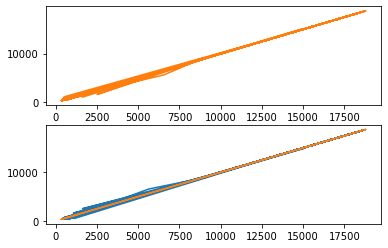

In [106]:
plt.figure(figsize=(12,7))
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(results, results.Prediction)
ax[1].plot(results, results.Actual);

## C'est tout ^^